In [7]:

# note this is saved in jkglab and that should be the master copy of this function
def hist_smoother(csv_path,squishfactor=50):

    import pandas as pd
    from pathlib import Path
    import numpy as np
    
    df = pd.read_csv(csv_path)
    columns = [x for x in df.columns if x not in ['bin','bins']]
    figpath = str(Path(csv_path).parent)+'/'

    def smooth(x,window_len=11,window='hanning'):
        if x.ndim != 1:
            print('error too many dimensions')
            return None
        if x.size < window_len:
            print('error window len too big')
            return None
        if window_len<3:
            return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
            print("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
            return None
        s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
        #print(len(s))
        if window == 'flat': #moving average
            w=np.ones(window_len,'d')
        else:
            w=eval('np.'+window+'(window_len)')
        y=np.convolve(w/w.sum(),s,mode='valid')
        return y

    bins_orig = df['bins'].values
    newbins = [bins_orig[i] for i in range(0,len(bins_orig),squishfactor)]
    df['newbins'] = [next((i for i,v in enumerate(newbins) if v>=x), max(newbins)) for x in bins_orig]
    for col in columns:
        s = sum(df[col].values)
        df[col] = [x/s for x in df[col].values]

    %matplotlib inline
    import matplotlib.pyplot as plt

    dfg = df.groupby('newbins').sum()

    for col in columns:
        f,ax = plt.subplots(figsize=[2,1])
        plt.plot(smooth(dfg[col].values,window_len=5))
        plt.title(col)
        plt.savefig(figpath+col+'.pdf')
    return dfg

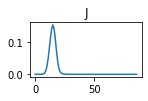

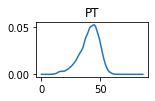

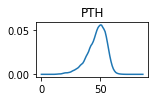

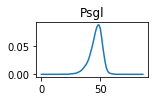

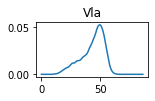

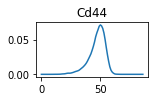

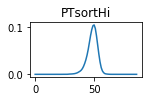

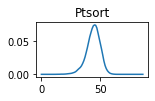

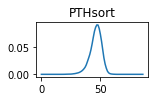

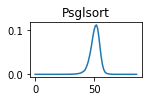

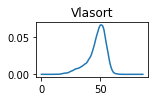

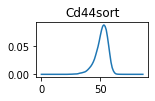

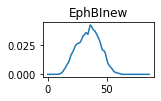

In [8]:
csv_path = '/Users/jkgerdts/Google Drive/LAB/data/2021 04-22 J lines expression.csv'
dfg = hist_smoother(csv_path,50)

In [91]:
4*60/2000

0.12